# Task 3 : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
df = pd.read_csv(r'D:\New folder\bank-full.csv', sep=';')

In [3]:
df.shape

(45211, 17)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA

C:\Users\HELLO\AppData\Local\Temp\ipykernel_27704\3576660544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


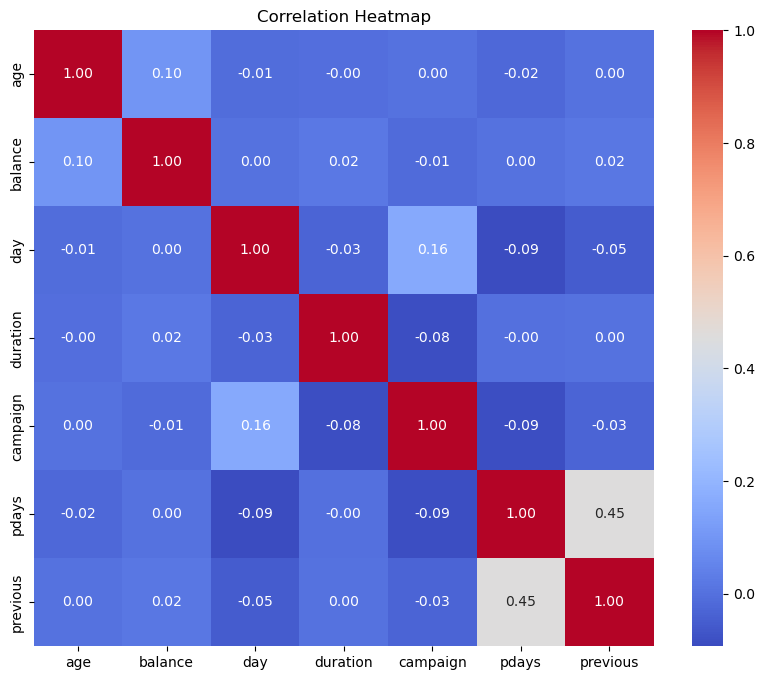

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df.drop(['poutcome','default','month'],axis=1,inplace=True)

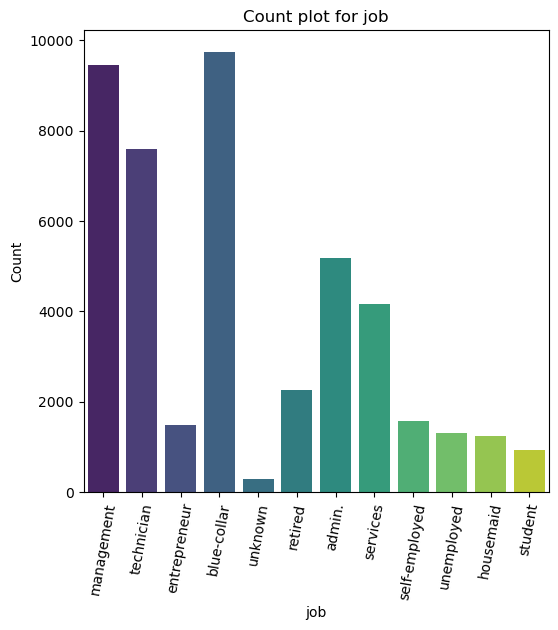

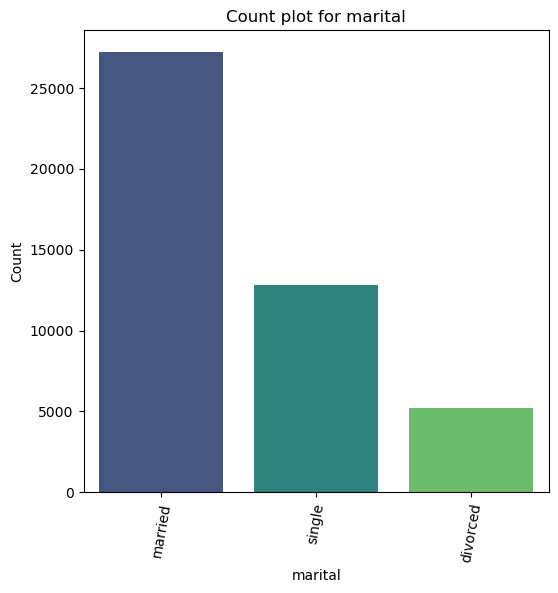

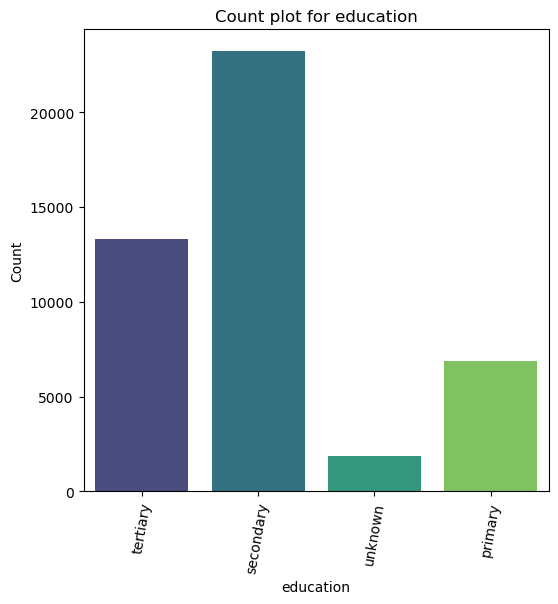

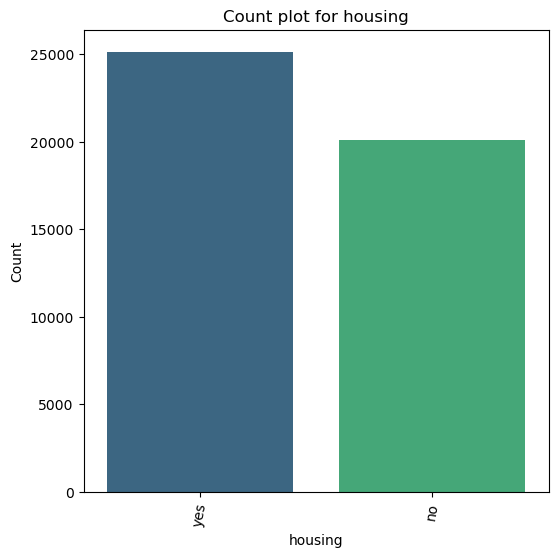

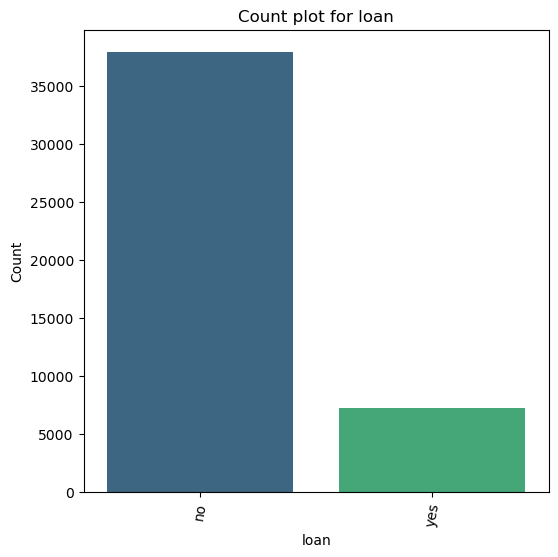

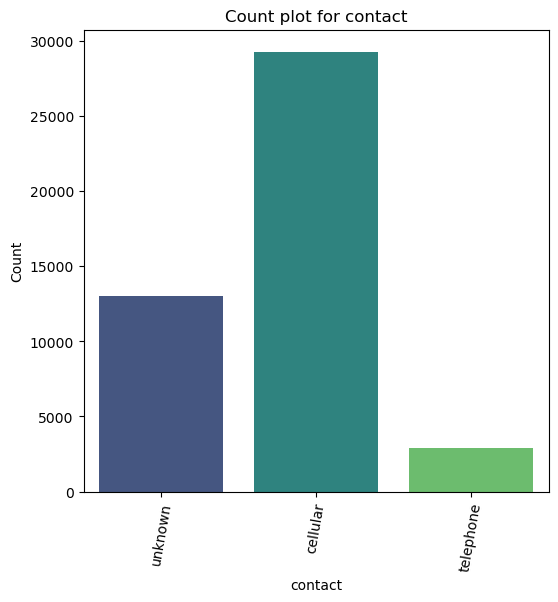

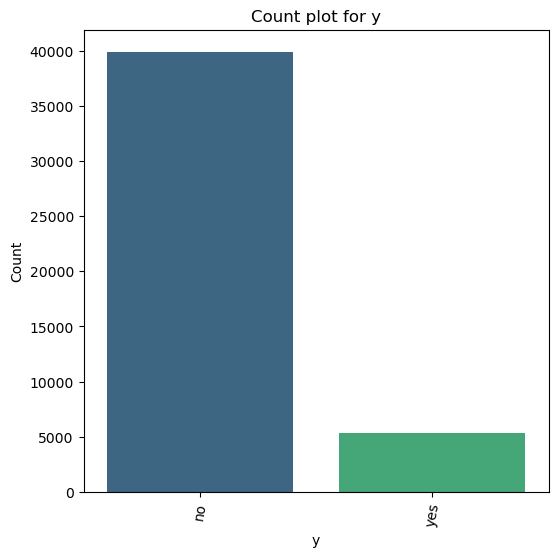

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(6, 6))
        sns.countplot(x=column, data=df, palette="viridis")
        plt.title(f'Count plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=80)  # Rotate x-axis labels if needed
        plt.show()

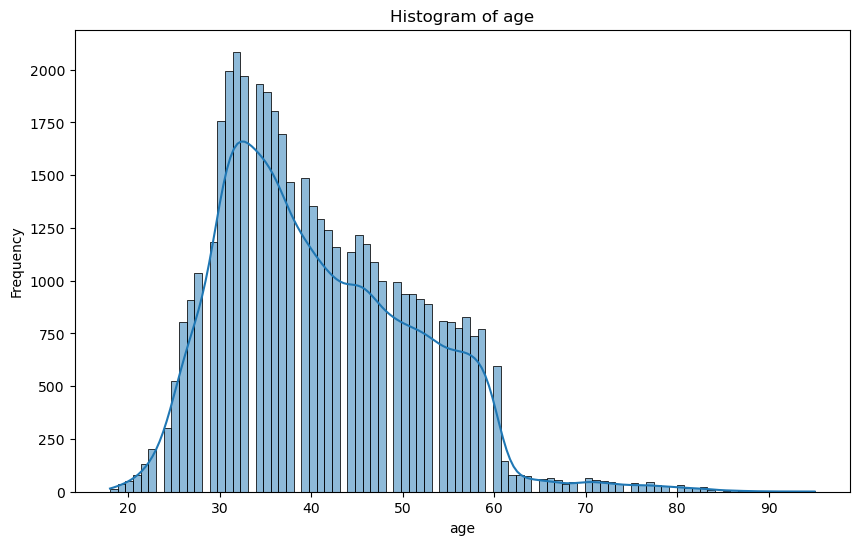

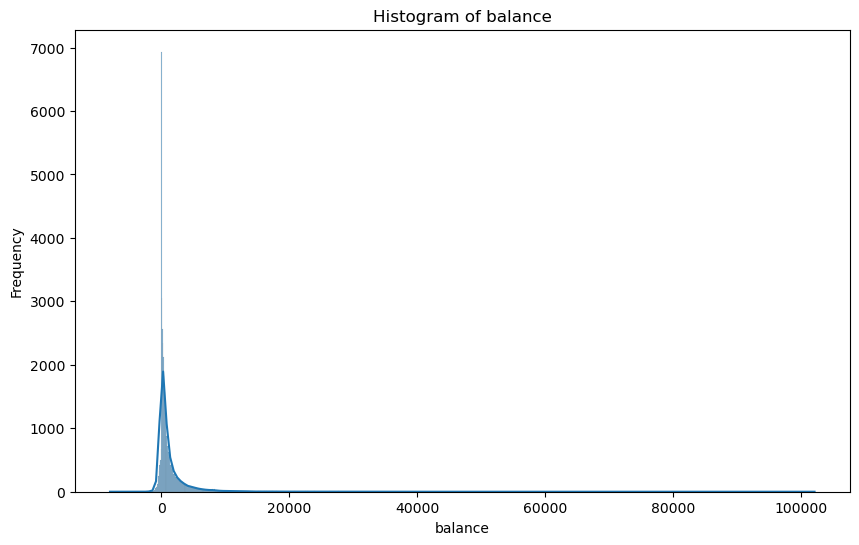

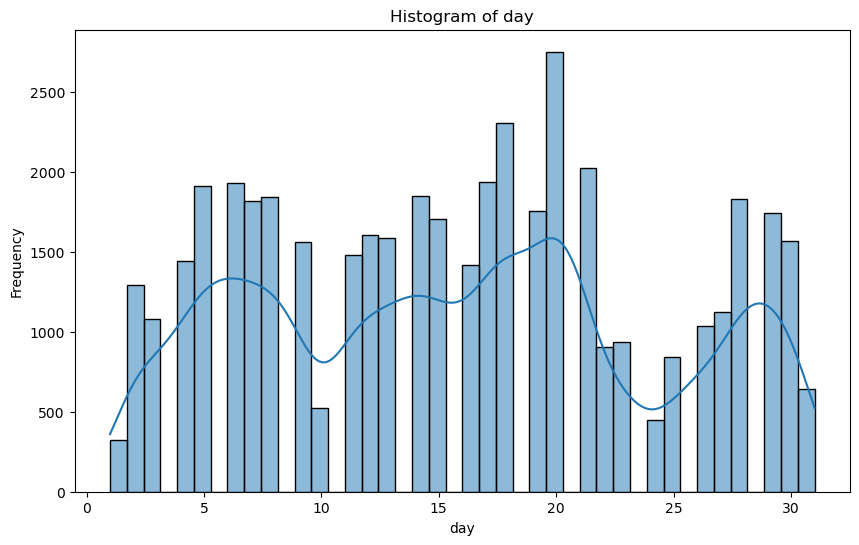

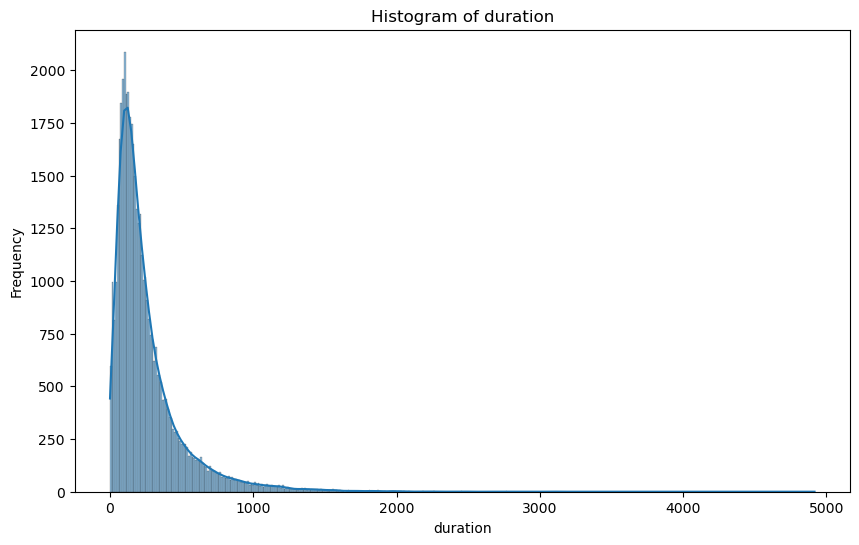

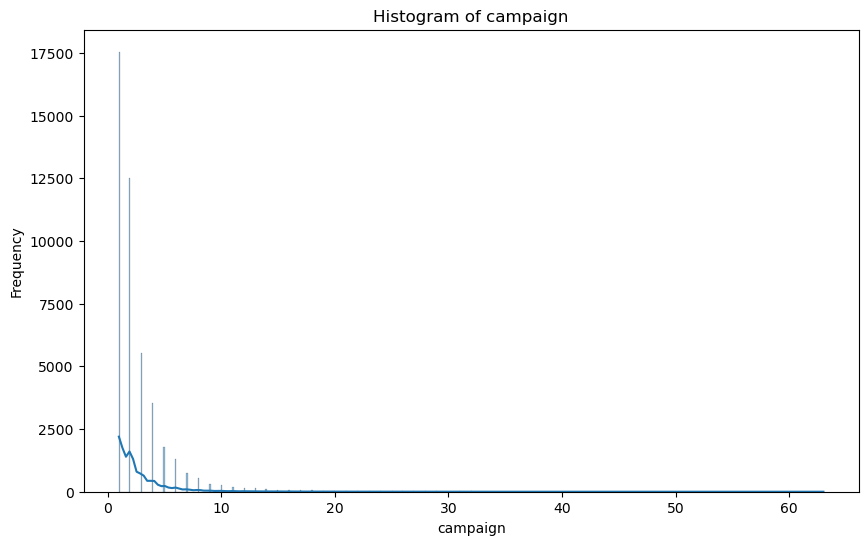

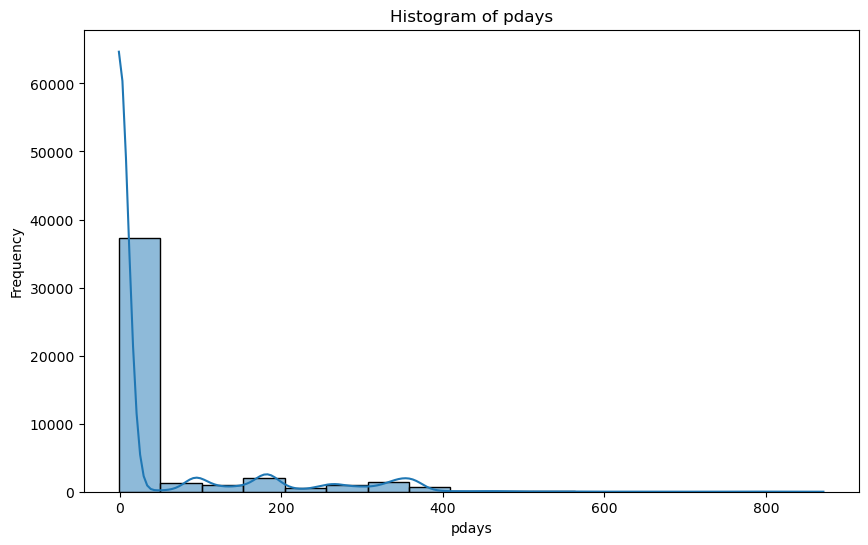

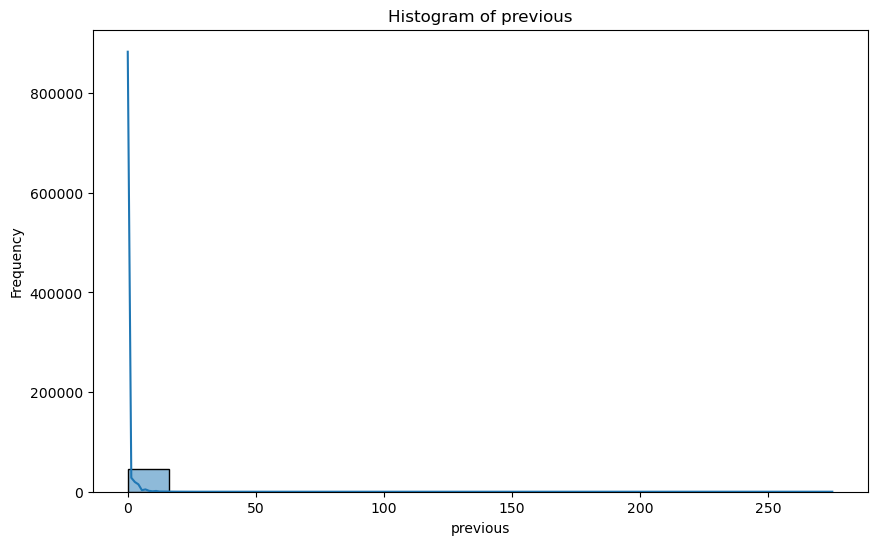

In [12]:
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        plt.figure(figsize=(10, 6))  # Adjust the size of the plot
        sns.histplot(df[column], kde=True)  # kde=True adds a density estimate
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [13]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'y']

## Converting Categorical values to Numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])

In [15]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
0,58,4,1,2,2143,1,0,2,5,261,1,-1,0,0
1,44,9,2,1,29,1,0,2,5,151,1,-1,0,0
2,33,2,1,1,2,1,1,2,5,76,1,-1,0,0
3,47,1,1,3,1506,1,0,2,5,92,1,-1,0,0
4,33,11,2,3,1,0,0,2,5,198,1,-1,0,0


In [16]:
X =df.values[:,0:-1]
Y =df.values[:,-1]
Y=Y.astype(int)

In [17]:
X.shape

(45211, 13)

In [18]:
Y.shape

(45211,)

## Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [20]:
print(X)

[[ 1.60696496 -0.10381968 -0.27576178 ... -0.56935064 -0.41145311
  -0.25194037]
 [ 0.28852927  1.42400783  1.3683719  ... -0.56935064 -0.41145311
  -0.25194037]
 [-0.74738448 -0.71495069 -0.27576178 ... -0.56935064 -0.41145311
  -0.25194037]
 ...
 [ 2.92540065  0.20174582 -0.27576178 ...  0.72181052  1.43618859
   1.05047333]
 [ 1.51279098 -1.02051619 -0.27576178 ...  0.39902023 -0.41145311
  -0.25194037]
 [-0.37068857 -0.71495069 -0.27576178 ... -0.24656035  1.4761376
   4.52357654]]


## Splitting the Data

In [21]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36168, 13)
(9043, 13)
(36168,)
(9043,)


In [23]:
import imblearn

In [24]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  4240
Before OverSampling, counts of label '0':  31928
After OverSampling, the shape of train_X:  (63856, 13)
After OverSampling, the shape of train_y:  (63856,)
After OverSampling, counts of label '1':  31928
After OverSampling, counts of label '0':  31928


### Running Decision Tree model.

In [25]:
# predicting using decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10,criterion="gini")

# fit the model on the data and predict the values
model_DT.fit(X_train_res,Y_train_res)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1),

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7036  958]
 [ 554  495]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7994
           1       0.34      0.47      0.40      1049

    accuracy                           0.83      9043
   macro avg       0.63      0.68      0.65      9043
weighted avg       0.86      0.83      0.84      9043

Accuracy of the model:  0.8327988499391795


In [27]:
model_DT.score(X_train, Y_train)

1.0

## Tuning the Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10,criterion='gini',splitter='best',min_samples_leaf=9,
                               min_samples_split=9,max_depth=13)

model_DT.fit(X_train_res,Y_train_res)
Y_pred=model_DT.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[6891 1103]
 [ 353  696]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7994
           1       0.39      0.66      0.49      1049

    accuracy                           0.84      9043
   macro avg       0.67      0.76      0.70      9043
weighted avg       0.89      0.84      0.86      9043

Accuracy of the model:  0.8389914851266173


* The recall of both the classes has improved and the accuracy is good as well.

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(random_state=10, bootstrap=True,n_jobs=-1)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7761  233]
 [ 672  377]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.62      0.36      0.45      1049

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy of the model:  0.899922592060157


## Extra Trees

In [32]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import ExtraTreesClassifier
 
model_EXT=ExtraTreesClassifier(n_estimators=100, random_state=10, bootstrap=True,n_jobs=-1)
 
#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)
 
Y_pred=model_EXT.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7829  165]
 [ 787  262]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.61      0.25      0.36      1049

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

Accuracy of the model:  0.8947252018135574


* We can use random forest for any future predictions as it is giving the best accuracy score.